<a id='notebook-top'></a>
This notebook plots the comparison between temperature-dependent Doppler shifts in the east upflow region and the west upflow region. The Doppler shifts were measured by Hinode/EIS and SolO/SPICE from different vantage points so they were deprojected assuming the flows are radial. 
Link to [Figure 4](#figure-4).

Note: The internal hyperlink only works on [GitHub Pages](https://yjzhu-solar.github.io/EIS_DKIST_SolO/eis_eui_upflow_ipynb_html/eis_spice_doppler_vs_tmax.html) or [nbviewer](https://nbviewer.org/github/yjzhu-solar/EIS_DKIST_SolO/blob/master/ipynb/ms_eis_eui_upflow/eis_spice_doppler_vs_tmax.ipynb). Do not click when viewing the notebook on GitHub.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from matplotlib import rc_context
from astropy.coordinates import SkyCoord
from sunpy.coordinates import (Helioprojective, HeliographicStonyhurst,
                               get_horizons_coord)

import astropy.units as u


In [2]:
ms_style_dict = {'text.usetex': True, 'font.family': 'serif', 'axes.linewidth': 1.2,
                 'xtick.major.width': 1.2, 'xtick.major.size': 4,
                 'ytick.major.width': 1.2, 'ytick.major.size': 4,
                 'xtick.minor.width': 1.2, 'xtick.minor.size': 2,
                 'ytick.minor.width': 1.2, 'ytick.minor.size': 2,
                 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'text.latex.preamble': r'\usepackage[T1]{fontenc}'
                 r'\usepackage{amsmath}' r'\usepackage{siunitx}'
                 r'\sisetup{detect-all=True}' r'\usepackage{fixltx2e}'}

In [3]:
with h5py.File('../../sav/EIS/Doppler/west_upflow_doppler_violin.h5', 'r') as hf:
    fe_12_195_west = hf['fe_12_195'][:]
    fe_08_185_west = hf['fe_08_185'][:]
    fe_09_197_west = hf['fe_09_197'][:]
    fe_10_184_west = hf['fe_10_184'][:]
    fe_11_188_west = hf['fe_11_188'][:]
    fe_13_203_west = hf['fe_13_202'][:]
    si_07_275_west = hf['si_07_275'][:]

with h5py.File('../../sav/EIS/Doppler/east_upflow_doppler_violin.h5', 'r') as hf:
    fe_12_195_east = hf['fe_12_195'][:]
    fe_08_185_east = hf['fe_08_185'][:]
    fe_09_197_east = hf['fe_09_197'][:]
    fe_10_184_east = hf['fe_10_184'][:]
    fe_11_188_east = hf['fe_11_188'][:]
    fe_13_203_east = hf['fe_13_202'][:]
    fe_14_264_east = hf['fe_14_264'][:]


In [4]:
fe_12_195_west = fe_12_195_west[np.abs(fe_12_195_west) < 60]
fe_08_185_west = fe_08_185_west[np.abs(fe_08_185_west) < 60]
fe_09_197_west = fe_09_197_west[np.abs(fe_09_197_west) < 60]
fe_10_184_west = fe_10_184_west[np.abs(fe_10_184_west) < 60]
fe_11_188_west = fe_11_188_west[np.abs(fe_11_188_west) < 60]
fe_13_203_west = fe_13_203_west[np.abs(fe_13_203_west) < 60]
si_07_275_west = si_07_275_west[np.abs(si_07_275_west) < 60]
fe_12_195_east = fe_12_195_east[np.abs(fe_12_195_east) < 60]
fe_08_185_east = fe_08_185_east[np.abs(fe_08_185_east) < 60]
fe_09_197_east = fe_09_197_east[np.abs(fe_09_197_east) < 60]
fe_10_184_east = fe_10_184_east[np.abs(fe_10_184_east) < 60]
fe_11_188_east = fe_11_188_east[np.abs(fe_11_188_east) < 60]
fe_13_203_east = fe_13_203_east[np.abs(fe_13_203_east) < 60]
fe_14_264_east = fe_14_264_east[np.abs(fe_14_264_east) < 60]


In [5]:
with h5py.File('../../sav/SPICE/upflow_region/east_upflow_violin_spice.h5', 'r') as hf:
    ne_8_770_east = hf['ne_8_770_vel'][:]

with h5py.File('../../sav/SPICE/upflow_region/west_upflow_violin_spice.h5', 'r') as hf:
    ne_8_770_west = hf['ne_8_770_vel'][:]
    ne_8_770_west = ne_8_770_west[np.abs(ne_8_770_west) < 40]

with h5py.File('../../sav/SPICE/upflow_region/west_loop_footpoint_violin_spice.h5', 'r') as hf:
    ne_8_770_west_loop = hf['ne_8_770_vel'][:]
    ne_8_770_west_loop = ne_8_770_west_loop[np.abs(ne_8_770_west_loop) < 40]

In [6]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.min((np.max(vals), upper_adjacent_value))

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.max((np.min(vals), lower_adjacent_value))
    return lower_adjacent_value, upper_adjacent_value

In [7]:
eis_west_helioproj = SkyCoord(-830*u.arcsec, 210*u.arcsec, 
                              frame=Helioprojective(observer='earth', obstime='2022-10-21T00:15:00'))

eis_west_heliograp = eis_west_helioproj.transform_to(HeliographicStonyhurst)
eis_west_cos = eis_west_heliograp.cartesian.xyz[0]/np.linalg.norm(eis_west_heliograp.cartesian.xyz)
eis_west_cos = np.abs(eis_west_cos.value)

eis_east_helioproj = SkyCoord(-450*u.arcsec, 200*u.arcsec,
                                frame=Helioprojective(observer='earth', obstime='2022-10-25T02:20:00'))
eis_east_heliograp = eis_east_helioproj.transform_to(HeliographicStonyhurst)
eis_east_cos = eis_east_heliograp.cartesian.xyz[0]/np.linalg.norm(eis_east_heliograp.cartesian.xyz)
eis_east_cos = np.abs(eis_east_cos.value)

print(eis_west_cos, eis_east_cos)

0.4395754728334729 0.8394366693376129


In [8]:
solo_west_heliograp = get_horizons_coord('solar orbiter', '2022-10-20T23:15:00')
spice_west_helioproj = SkyCoord(-70*u.arcsec, 600*u.arcsec,
                                frame=Helioprojective(observer=solo_west_heliograp,
                                                      obstime='2022-10-20T23:15:00'))
spice_west_heliograp = spice_west_helioproj.transform_to(HeliographicStonyhurst)
spice_west_cos = np.dot(solo_west_heliograp.cartesian.xyz,spice_west_heliograp.cartesian.xyz)/ \
                    (np.linalg.norm(solo_west_heliograp.cartesian.xyz)*np.linalg.norm(spice_west_heliograp.cartesian.xyz))
spice_west_cos = np.abs(spice_west_cos.value)

solo_east_heliograp = get_horizons_coord('solar orbiter', '2022-10-24T23:20:00')
spice_east_helioproj = SkyCoord(720*u.arcsec, 470*u.arcsec,
                                frame=Helioprojective(observer=solo_east_heliograp,
                                                      obstime='2022-10-24T23:20:00'))
spice_east_heliograp = spice_east_helioproj.transform_to(HeliographicStonyhurst)
spice_east_cos = np.dot(solo_east_heliograp.cartesian.xyz,spice_east_heliograp.cartesian.xyz)/ \
                    (np.linalg.norm(solo_east_heliograp.cartesian.xyz)*np.linalg.norm(spice_east_heliograp.cartesian.xyz))
spice_east_cos = np.abs(spice_east_cos.value)

print(spice_west_cos, spice_east_cos)

INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]
0.9766769664894775 0.9366192629092313


<a id='figure-4'></a>
### Figure 4
(You may have to pull down to see the notebook preview of the figure)

[back to top](#notebook-top) 

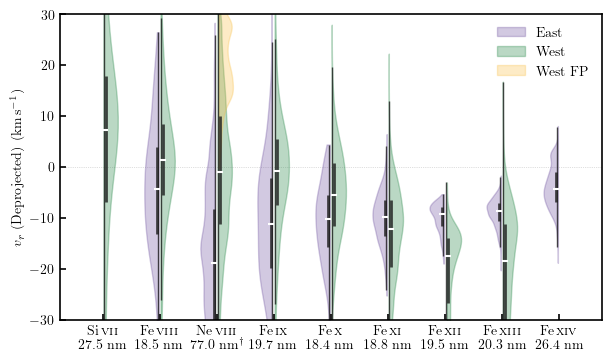

In [9]:
with rc_context(ms_style_dict):
    fig, ax = plt.subplots(layout='constrained', figsize=(6,3.5))

    labels = [r'Si\,\textsc{vii} 27.5', r'Fe\,\textsc{viii} 18.5', r'Ne\,\textsc{viii} 77.0', r'Fe\,\textsc{ix} 19.7',
              r'Fe\,\textsc{x} 18.4', r'Fe\,\textsc{xi} 18.8', r'Fe\,\textsc{xii} 19.5', r'Fe\,\textsc{xiii} 20.3',
              r'Fe\,\textsc{xiv} 26.4']
    
    for ii, label in enumerate(labels):
        label_split = label.split(' ')
        if len(label_split) == 2:
            label = label_split[0] + '\n' + label_split[1] + r' nm'
            labels[ii] = label
    
    labels[2] = labels[2] + r'\textsuperscript{\textdagger}'


    all_data_west = [si_07_275_west/eis_west_cos, fe_08_185_west/eis_west_cos,
                     ne_8_770_west/spice_west_cos,fe_09_197_west/eis_west_cos, 
                     fe_10_184_west/eis_west_cos, fe_11_188_west/eis_west_cos,
                     fe_12_195_west/eis_west_cos, fe_13_203_west/eis_west_cos]
    position_west = np.array([1,2,3,4,5,6,7,8])

    all_data_east = [fe_08_185_east/eis_east_cos, ne_8_770_east/spice_east_cos,
                        fe_09_197_east/eis_east_cos, fe_10_184_east/eis_east_cos,
                        fe_11_188_east/eis_east_cos, fe_12_195_east/eis_east_cos,
                        fe_13_203_east/eis_east_cos, fe_14_264_east/eis_east_cos]


    position_east = np.array([2,3,4,5,6,7,8,9])

    all_data_west_loop = [ne_8_770_west_loop/spice_west_cos]

    position_west_loop = np.array([3])

                    
    vp_west = ax.violinplot(all_data_west, positions=position_west,showmeans=False,
                        showmedians=False, showextrema=False,
                        side='high')

    vp_east = ax.violinplot(all_data_east, positions=position_east,showmeans=False,
                            showmedians=False, showextrema=False,
                            side='low')
    
    vp_west_loop = ax.violinplot(all_data_west_loop, positions=position_west_loop,showmeans=False,
                            showmedians=False, showextrema=False,
                            side='high')

    for pc in vp_west['bodies']:
        pc.set_facecolor((27/255.,129/255.,62/255.,0.5))
        pc.set_edgecolor((27/255.,129/255.,62/255.,1))
        pc.set_offsets([1.5,0])

    for pc in vp_east['bodies']:
        pc.set_facecolor((106/255.,76/255.,156/255.,0.5))
        pc.set_edgecolor((106/255.,76/255.,156/255.,1))
        pc.set_offsets([-1.5,0])

    for pc in vp_west_loop['bodies']:
        pc.set_facecolor((249/255.,191/255.,69/255.,0.5))
        pc.set_edgecolor((249/255.,191/255.,69/255.,1))
        pc.set_offsets([1.5,0])

    west_quartile1, west_medians, west_quartile3 = [], [], []

    for data in all_data_west:
        west_quartile1.append(np.nanpercentile(data, 25))
        west_medians.append(np.nanpercentile(data, 50))
        west_quartile3.append(np.nanpercentile(data, 75))

    west_whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(all_data_west, west_quartile1, west_quartile3)])
    west_whiskers_min, west_whiskers_max = west_whiskers[:, 0], west_whiskers[:, 1]

    ln_quart_west = ax.vlines(position_west, west_quartile1, west_quartile3, color='#1C1C1C', linestyle='-', lw=2,
                            alpha=0.8)
    ln_quart_west.set_offsets([3.05,0])
    ln_whisker_west = ax.vlines(position_west, west_whiskers_min, west_whiskers_max, color='#1C1C1C', linestyle='-', lw=1,
                            alpha=0.8)
    ln_whisker_west.set_offsets([1.6,0])
    ln_median_west = ax.scatter(position_west+5.2/100, west_medians, marker='_', color='white', s=15,zorder=5)

    east_quartile1, east_medians, east_quartile3 = [], [], []

    for data in all_data_east:
        east_quartile1.append(np.percentile(data, 25))
        east_medians.append(np.percentile(data, 50))
        east_quartile3.append(np.percentile(data, 75))

    east_whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(all_data_east, east_quartile1, east_quartile3)])

    east_whiskers_min, east_whiskers_max = east_whiskers[:, 0], east_whiskers[:, 1]

    ln_quart_east = ax.vlines(position_east, east_quartile1, east_quartile3, color='#1C1C1C', linestyle='-', lw=2,
                            alpha=0.8)
    ln_quart_east.set_offsets([-3.05,0])
    ln_whisker_east = ax.vlines(position_east, east_whiskers_min, east_whiskers_max, color='#1C1C1C', linestyle='-', lw=1,
                            alpha=0.8)
    ln_whisker_east.set_offsets([-1.6,0])
    ln_median_east = ax.scatter(position_east-5.2/100, east_medians, marker='_', color='white', s=15,zorder=5)


    legs = ax.legend([vp_east['bodies'][0], vp_west['bodies'][0], vp_west_loop['bodies'][0]], ['East', 'West', 'West FP'], frameon=False)

    # renderer = fig.canvas.get_renderer()
    # shift = max([t.get_window_extent(renderer).width for t in legs.get_texts()])
    # for t in legs.get_texts():
    #     text_width = t.get_window_extent().width
    #     t.set_position((shift - text_width,0))
    # for patch_ in legs.get_patches():
    #     patch_.set_x(shift - text_width)


    ax.axhline(0, color='grey', lw=0.5, ls=':',alpha=0.5, zorder=0)

    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_ylim(-30,30)
    ax.set_ylabel(r'$v_{r}\ \mathrm{(Deprojected)}\ \mathrm{(km\,s^{-1})}$')

    plt.savefig('../../figs/ms_eis_eui_upflow/eis_spice_doppler_vs_tmax.pdf', dpi=300, bbox_inches='tight')
    plt.show()